<a href="https://colab.research.google.com/github/satoruk-icepp/MEG2XEC/blob/master/AlphaCosmic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install uproot

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import uproot

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
file = uproot.open("/content/drive/My Drive/MEG2CW/alpha351601.root")
tout = file["talpha"]

In [7]:
PMResponse = tout.array("nphoarray")
PosAll = tout.array("alphaposall")
alphaid=tout.array("alphaid")
qaratio=tout.array("qaratio")
indx_wire2 = alphaid//5==2
isalpha = np.array((qaratio > 4) & (qaratio<6)).astype(int)
print(isalpha)

[0 1 1 ... 1 1 0]


In [8]:
PMResponse_train,PMResponse_test = np.split(PMResponse,[3000])
isalpha_train,isalpha_test = np.split(isalpha,[3000])
print(len(PMResponse_train),len(isalpha_test))

3000 1035


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [18]:
print(model(PMResponse_train.reshape(PMResponse_train.shape[0],-1)))
predictions = model(PMResponse_train.reshape(PMResponse_train.shape[0],-1))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[9.9959332e-01]
 [2.0743153e-12]
 [4.6820436e-13]
 ...
 [3.3332739e-04]
 [1.4444336e-16]
 [1.0000000e+00]], shape=(3000, 1), dtype=float32)


In [0]:
bce = tf.keras.losses.BinaryCrossentropy()

In [0]:
model.compile(optimizer='adam',
              loss=bce,
              metrics=['accuracy'])

In [23]:
model.fit(PMResponse_train,isalpha_train, epochs=100)

Train on 3000 samples
Epoch 1/100
3000/3000 [==============================] - 1s 267us/sample - loss: 0.1566 - accuracy: 0.9430
Epoch 2/100
3000/3000 [==============================] - 1s 284us/sample - loss: 0.1726 - accuracy: 0.9417
Epoch 3/100
3000/3000 [==============================] - 1s 272us/sample - loss: 0.1343 - accuracy: 0.9503
Epoch 4/100
3000/3000 [==============================] - 1s 275us/sample - loss: 0.1035 - accuracy: 0.9580
Epoch 5/100
3000/3000 [==============================] - 1s 278us/sample - loss: 0.1051 - accuracy: 0.9617
Epoch 6/100
3000/3000 [==============================] - 1s 266us/sample - loss: 0.1251 - accuracy: 0.9593
Epoch 7/100
3000/3000 [==============================] - 1s 269us/sample - loss: 0.1980 - accuracy: 0.9420
Epoch 8/100
3000/3000 [==============================] - 1s 275us/sample - loss: 0.1982 - accuracy: 0.9493
Epoch 9/100
3000/3000 [==============================] - 1s 272us/sample - loss: 0.2937 - accuracy: 0.9363
Epoch 10/100
30

(array([ 24.,   3.,   7.,   2.,   5.,   4.,   3.,   8.,  25., 456.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 1 Patch objects>)

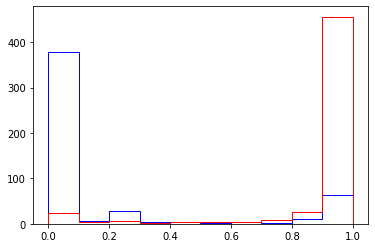

In [38]:
isalpha_pred_test = model(PMResponse_test.reshape(PMResponse_test.shape[0],-1))
plt.hist(isalpha_pred_test[isalpha_test<0.5].numpy().reshape(-1),color='b',histtype='step')
plt.hist(isalpha_pred_test[isalpha_test>0.5].numpy().reshape(-1),color='r',histtype='step')

In [0]:
PMResponse = PMResponse[indx_wire2]
PosAll = PosAll[indx_wire2]

In [0]:
plt.hist(qaratio,range=(0,10),bins=40)

In [0]:
plt.hist(alphaid[indx_wire2])

In [0]:
plt.hist(PosAll[:,2])

In [0]:
# !pip install optuna
# import optuna

In [0]:
# def objective():
#     clusterer = cluster.DBSCAN(eps=1000,min_samples=4)
#     y_pred = clusterer.fit_predict(PMResponse)
#     nc = len(np.unique(y_pred))
#     return nc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)



In [0]:
from sklearn import metrics

In [0]:
score_array = []
eps_array = []
# for i in range(10):
#     # eps = (i+1)*200+1000
#     eps
eps = 2
clusterer = cluster.DBSCAN(eps=eps,min_samples=5)
# clusterer = cluster.KMeans(n_clusters=5)
# y_pred = clusterer.fit_predict(PMResponse)
y_pred = clusterer.fit_predict(PosAll)
# if len(np.unique(y_pred))<2: continue
# score = metrics.silhouette_score(PMResponse,y_pred)
score = metrics.silhouette_score(PosAll,y_pred)
print(score)
score_array.append(score)
eps_array.append(eps)

In [0]:
plt.scatter(eps_array,score_array)

In [0]:
# print(metrics.silhouette_score(PMResponse,y_pred))

In [0]:
plt.hist(y_pred)

In [0]:
plt.hist(PosAll[y_pred==4,2])